<img src="lanacapa.png">

# 1. O que as pessoas estão falando sobre "Chemtrails over the Country Club"?
[Por Hernandes Matias Junior](https://www.linkedin.com/in/hernandesmjunior/)

Motivado pelo lançamento do novo álbum da Lana del Rey, nesse pequeno projeto irei utilizar a raspagem de dados para coletar as reviews do "Chemtrails over the Country Club" escritas pelos usuários no site do Metacritic. Após a coleta, farei um pré-processamento dos dados e os representarei em uma nuvem de palavras, para que seja feita uma análise qualitativa.

# 2. Importando as bibliotecas

Serão utilizadas as bibliotecas pandas, para o manuseio dos dados, e o requests e beautifulsoup, para o webscraping.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

sns.set()

%matplotlib inline

# 3. Extraindo os dados

Até o momento da extração, o álbum contava com 11 páginas de reviews escritas por usuários, começando do número 0.

In [2]:
review_dict = {'name':[], 'date':[], 'rating':[], 'review':[]}


for page in range(0,10): 

    url = 'https://www.metacritic.com/music/chemtrails-over-the-country-club/lana-del-rey/user-reviews?page=' + str(page)

    user_agent =  {'User-agent': 'Mozilla/5.0'}

    response = requests.get(url, headers = user_agent)
    
    #time.sleep(rand.randint(3,30)) 

    soup = BeautifulSoup(response.text, 'html.parser')
    
    for review in soup.find_all('div', class_='review_content'):
        
        if review.find('div', class_='name') == None:
                        break
        
        review_dict['name'].append(review.find('div', class_='name').find('a').text)
        review_dict['date'].append(review.find('div', class_='date').text)
        review_dict['rating'].append(review.find('div', class_='review_grade').find_all('div')[0].text)
        
        if review.find('span', class_='blurb blurb_expanded'):
            review_dict['review'].append(review.find('span', class_='blurb blurb_expanded').text)
        else:
            review_dict['review'].append(review.find('div', class_='review_body').find('span'))
            
            

In [3]:
lana_reviews = pd.DataFrame(review_dict) 

In [4]:
lana_reviews

,name,date,rating,review
0,nickkingofearth,"Mar 19, 2021",10,"[The album is experimental, soft, jazzy, decon..."
1,major_tom,"Mar 19, 2021",10,"[White Dress, Tulsa Jesus Freak, Dark But Just..."
2,NathandelRey,"Mar 19, 2021",10,"[Lana Make a perfect story, make me feel happy..."
3,Panchogul,"Mar 19, 2021",10,"[Excelente trabajo, majestuoso en todo su espl..."
4,domenico629,"Mar 18, 2021",10,[It’s a perfect album. It has a different vibe...
...,...,...,...,...
995,spawnerw,"Mar 20, 2021",10,"[Me gustó mucho, lana calma a cualquiera al es..."
996,brunobarreto,"Mar 20, 2021",10,"[Amazing album it’s so good with great lyrics,..."
997,brandonmg,"Mar 20, 2021",10,"Es increíble su nuevo álbum, ha demostrado ser..."
998,SofhMR,"Mar 20, 2021",10,"[Es una álbum maravilloso,este es el mejor álb..."


In [5]:
lana_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1000 non-null   object
 1   date    1000 non-null   object
 2   rating  1000 non-null   object
 3   review  998 non-null    object
dtypes: object(4)
memory usage: 31.4+ KB


# 4. Análise exploratória dos dados

O site do Metacritic atribui que a crítica ao álbum foi "Positive", "Negative" e "Mixed" conforme o seu score. Aqui, farei essa classificação com base na coluna "rating" do meu dataframe.

In [6]:
lana_reviews['rating'] = lana_reviews['rating'].astype(int)

for i in range(len(lana_reviews)):
    if (lana_reviews.loc[i,'rating'] >= 7):
        lana_reviews.loc[i,'critic'] = 'Positive'
        
    elif (lana_reviews.loc[i, 'rating'] >= 4) & (lana_reviews.loc[i, 'rating'] < 7):
        lana_reviews.loc[i,'critic'] = 'Mixed'
        
    else:
        lana_reviews.loc[i,'critic'] = 'Negative'

In [7]:
lana_reviews

,name,date,rating,review,critic
0,nickkingofearth,"Mar 19, 2021",10,"[The album is experimental, soft, jazzy, decon...",Positive
1,major_tom,"Mar 19, 2021",10,"[White Dress, Tulsa Jesus Freak, Dark But Just...",Positive
2,NathandelRey,"Mar 19, 2021",10,"[Lana Make a perfect story, make me feel happy...",Positive
3,Panchogul,"Mar 19, 2021",10,"[Excelente trabajo, majestuoso en todo su espl...",Positive
4,domenico629,"Mar 18, 2021",10,[It’s a perfect album. It has a different vibe...,Positive
...,...,...,...,...,...
995,spawnerw,"Mar 20, 2021",10,"[Me gustó mucho, lana calma a cualquiera al es...",Positive
996,brunobarreto,"Mar 20, 2021",10,"[Amazing album it’s so good with great lyrics,...",Positive
997,brandonmg,"Mar 20, 2021",10,"Es increíble su nuevo álbum, ha demostrado ser...",Positive
998,SofhMR,"Mar 20, 2021",10,"[Es una álbum maravilloso,este es el mejor álb...",Positive


Text(0, 0.5, 'Frequência')

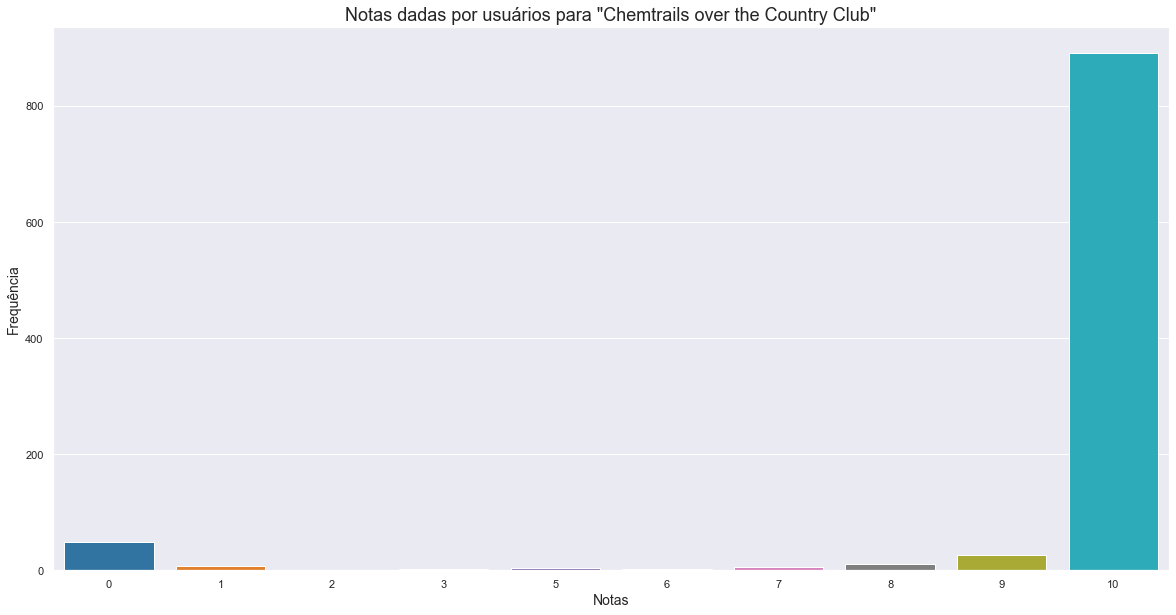

In [8]:
plt.figure(figsize=(20,10))
sns.countplot(x='rating', data=lana_reviews, palette='tab10');
plt.title('Notas dadas por usuários para "Chemtrails over the Country Club"', fontsize=18)
plt.xlabel('Notas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)


 

Interessante notar a frequência das notas que o álbum recebeu. A audiência dividiu-se entre os dois extremos, quem amou e quem odiou. São poucas as notas que caracterizam uma crítica "Mixed".

In [9]:
lana_reviews[['critic', 'name']].groupby('critic').count()

,name
critic,
Mixed,6
Negative,60
Positive,934


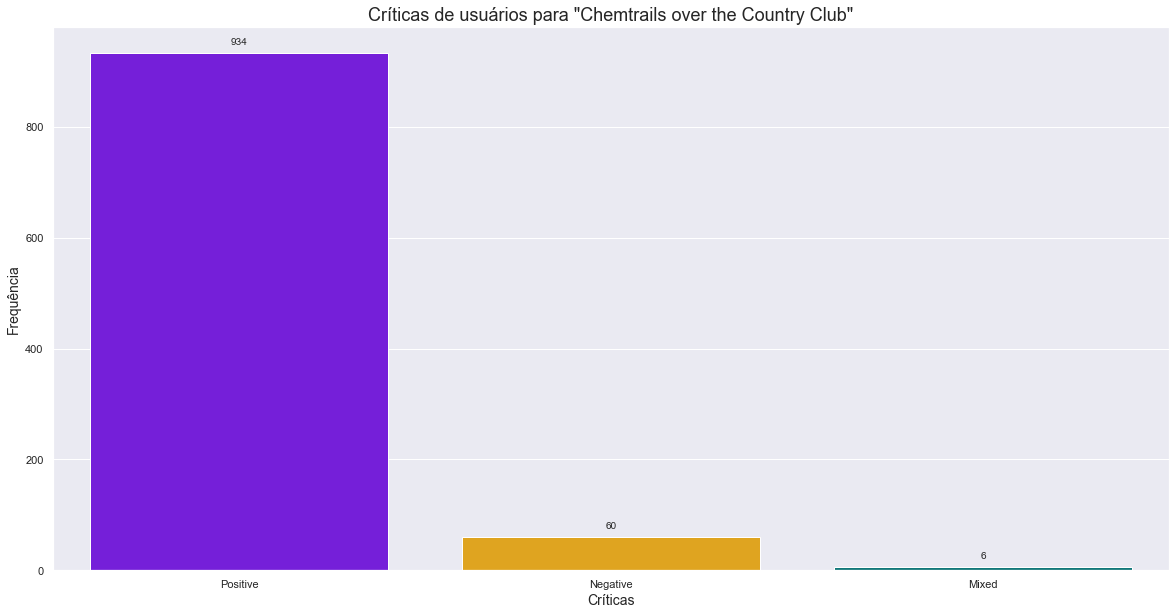

In [10]:
plt.figure(figsize=(20,10))
graph = sns.countplot(x= 'critic',data=lana_reviews, palette='prism_r');
plt.title('Críticas de usuários para "Chemtrails over the Country Club"', fontsize=18)
plt.xlabel('Críticas', fontsize=14)
plt.ylabel('Frequência', fontsize=14)

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 15,
        lana_reviews['critic'].value_counts()[i],ha="center")
    i += 1

Para a análise qualitativa, separamos as reviews positivas e negativas, com o objetivo de visualizar o que cada um desses dois grupos está falando do álbum da Lana. Como as reviews de "Mixed" foram muito poucas, elas serão desconsideradas nessa análise.

In [11]:
positive = lana_reviews[lana_reviews['critic'] == 'Positive']

In [12]:
positive.head()

,name,date,rating,review,critic
0,nickkingofearth,"Mar 19, 2021",10,"[The album is experimental, soft, jazzy, decon...",Positive
1,major_tom,"Mar 19, 2021",10,"[White Dress, Tulsa Jesus Freak, Dark But Just...",Positive
2,NathandelRey,"Mar 19, 2021",10,"[Lana Make a perfect story, make me feel happy...",Positive
3,Panchogul,"Mar 19, 2021",10,"[Excelente trabajo, majestuoso en todo su espl...",Positive
4,domenico629,"Mar 18, 2021",10,[It’s a perfect album. It has a different vibe...,Positive


In [13]:
negative = lana_reviews[lana_reviews['critic'] == 'Negative']

In [14]:
negative.head()

,name,date,rating,review,critic
115,Marirobles,"Mar 19, 2021",0,"Esta muy aburrido es muy flop, debería de hace...",Negative
116,capitol325,"Mar 19, 2021",0,[Such a good album like wine at the summer hea...,Negative
117,Luuqee,"Mar 19, 2021",0,"[Perfeito, único, deslumbrante, fenomenal, mai...",Negative
119,justinkingofpop,"Mar 19, 2021",0,[Expectations were high after NFR. Wasn’t expe...,Negative
120,Evanesims,"Mar 19, 2021",1,"[One of the most boring, pretentious albums I ...",Negative


# 5. Exportando os dados

In [15]:
positive.to_csv('positive.csv')

In [16]:
negative.to_csv('negative.csv')

# 6. Criando uma nuvem de palavras

As reviews positivas e negativas serão representadas em uma nuvem de palavras, mas utilizando uma imagem da Lana del Rey para dar forma à visualização.

In [17]:
import csv
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

from wordcloud import WordCloud, ImageColorGenerator
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\herna\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### Críticas positivas

In [18]:
reviews = pd.read_csv(r"C:\Users\herna\OneDrive\Projetos Avulsos\Web Scraping Lana Del Rey\positive.csv")

In [19]:
reviews

,Unnamed: 0,name,date,rating,review,critic
0,0,nickkingofearth,"Mar 19, 2021",10,"<span>The album is experimental, soft, jazzy, ...",Positive
1,1,major_tom,"Mar 19, 2021",10,"<span>White Dress, Tulsa Jesus Freak, Dark But...",Positive
2,2,NathandelRey,"Mar 19, 2021",10,"<span>Lana Make a perfect story, make me feel ...",Positive
3,3,Panchogul,"Mar 19, 2021",10,"<span>Excelente trabajo, majestuoso en todo su...",Positive
4,4,domenico629,"Mar 18, 2021",10,<span>It’s a perfect album. It has a different...,Positive
...,...,...,...,...,...,...
929,995,spawnerw,"Mar 20, 2021",10,"<span>Me gustó mucho, lana calma a cualquiera ...",Positive
930,996,brunobarreto,"Mar 20, 2021",10,<span>Amazing album it’s so good with great ly...,Positive
931,997,brandonmg,"Mar 20, 2021",10,"Es increíble su nuevo álbum, ha demostrado ser...",Positive
932,998,SofhMR,"Mar 20, 2021",10,"<span>Es una álbum maravilloso,este es el mejo...",Positive


In [20]:
reviews = list(reviews['review'])

In [21]:
len(reviews)

934

In [22]:
# como as reviews vieram com o termo "span", parte do código HTML que a review foi retirada, fiz uma substituição
# para que a palavra não poluísse a nuvem.

reviews = [str(w).replace('span', ' ') for w in reviews]

In [23]:
reviews

['< >The album is experimental, soft, jazzy, deconstructed. Completely unexpected and I loved it.</ >',
 '< >White Dress, Tulsa Jesus Freak, Dark But Just A Game: These are all very different and beautifully produced songs. Lana keeps getting better!</ >',
 '< >Lana Make a perfect story, make me feel happy and sad, but in love; THKS Lana</ >',
 '< >Excelente trabajo, majestuoso en todo su esplendor, es difícil decidir si está a la altura de Norman **** Rockwell, el cual ha sido el mejor trabajo de Lana hasta la fecha, está al mismo nivel o quizás superior, pero nunca más abajo, valió la pena la espera </ >',
 '< >It’s a perfect album. It has a different vibe than NFR , it’s more quiet and soft , with a country vibe to it , but also a lot more personal.<br/>It’s definitely one of the most mature album from Lana , it seems like a transition to something that will be more precise and outstanding , love it.</ >',
 '< >GOD IS A WOMAN, But Lana is god BECAUSE, is god , the album is **** amaz

Faz-se necessário também remover as "stopwords", palavras que não agregam a nossa análise. Um exemplo dessas "stopwords" em inglês são o "the", "is", "it".

In [24]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in reviews: 
    
           
    word_tokens = word_tokens + word_tokenize(review) 
  
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [25]:
print(word_tokens[:50]) 
print(filtered_word_reviews[:50])

['<', '>', 'The', 'album', 'is', 'experimental', ',', 'soft', ',', 'jazzy', ',', 'deconstructed', '.', 'Completely', 'unexpected', 'and', 'I', 'loved', 'it.', '<', '/', '>', '<', '>', 'White', 'Dress', ',', 'Tulsa', 'Jesus', 'Freak', ',', 'Dark', 'But', 'Just', 'A', 'Game', ':', 'These', 'are', 'all', 'very', 'different', 'and', 'beautifully', 'produced', 'songs', '.', 'Lana', 'keeps', 'getting']
['<', '>', 'The', 'album', 'experimental', ',', 'soft', ',', 'jazzy', ',', 'deconstructed', '.', 'Completely', 'unexpected', 'I', 'loved', 'it.', '<', '/', '>', '<', '>', 'White', 'Dress', ',', 'Tulsa', 'Jesus', 'Freak', ',', 'Dark', 'But', 'Just', 'A', 'Game', ':', 'These', 'different', 'beautifully', 'produced', 'songs', '.', 'Lana', 'keeps', 'getting', 'better', '!', '<', '/', '>', '<']


In [26]:
len(filtered_word_reviews)

30157

In [27]:
len(word_tokens)

39718

In [28]:
def drawWordCloud(words, filename):
    text = ''
    for w in words:
        text = text + ' ' + w

    mask = np.array(Image.open(r"C:\Users\herna\OneDrive\Projetos Avulsos\Web Scraping Lana Del Rey\lanamask.jpg"))
    image_colors = ImageColorGenerator(mask)

    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud( background_color="white", max_words=1000, mask=mask).generate(text)
    
    fig, axes = plt.subplots(1,2 , figsize=(16,20))
    axes[0].imshow(mask, cmap=plt.cm.gray, interpolation="bilinear")
    axes[1].imshow(wordcloud.recolor(color_func=image_colors,random_state=3),
           interpolation="bilinear")
    for ax in axes:
        ax.set_axis_off()
    plt.savefig(filename+".png", format="png", dpi=200)
    plt.show()

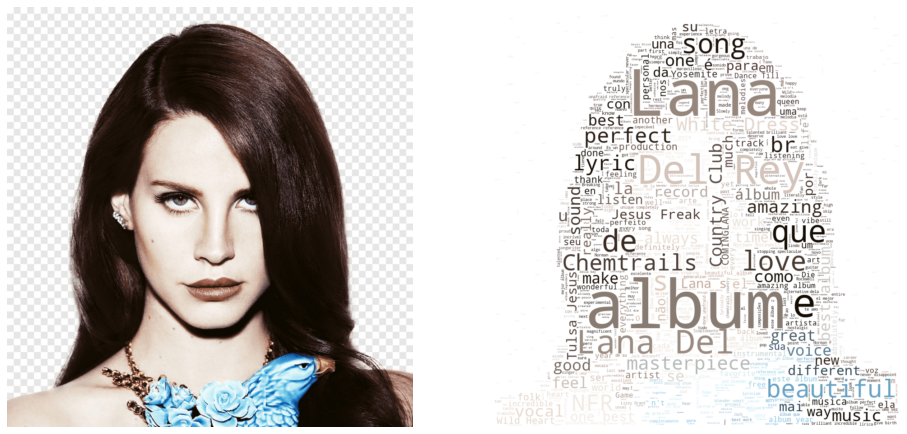

In [29]:
drawWordCloud(filtered_word_reviews,"wordcloudlana-positive")

O resultado não foi tão satisfatório, pois palavras como "album", "song", "Lana", se repetem muito e ganham destaque na nuvem. Para a análise qualitativa, vamos focar então nos adjetivos que aparecem nas reviews do "Chemtrails over the Country Club"

In [30]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print (adjs[:10])

['soft', 'jazzy', 'unexpected', 'it.', 'different', '<', '/', 'perfect', 'happy', 'cual']


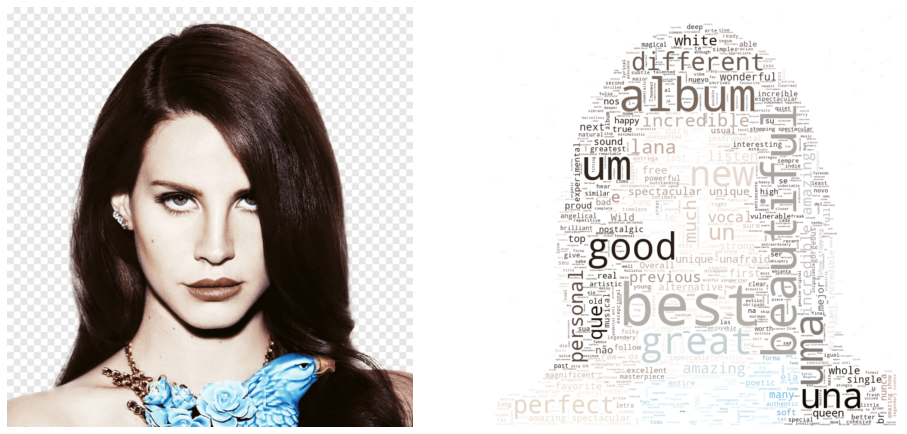

In [31]:
drawWordCloud(adjs,"wordcloudlana-positive")

Agora sim é possível visualizar as palavras que se repetem nas reviews positivas do álbum, como "beautiful", "great", "good", "personal", "perfect" e "incredible".

### Críticas negativas

In [32]:
reviews = pd.read_csv(r"C:\Users\herna\OneDrive\Projetos Avulsos\Web Scraping Lana Del Rey\negative.csv")

In [33]:
reviews = list(reviews['review'])

In [34]:
len(reviews)

60

In [35]:
reviews

['Esta muy aburrido es muy flop, debería de hacer algo nuevo la verdad, se parece a taylor no se sabe de donde sacan críticas buenas',
 '<span>Such a good album like wine at the summer heat. Lana, as always, created a unique atmosphere, created her new world and found herself</span>',
 '<span>Perfeito, único, deslumbrante, fenomenal, maioral, tudo de bom, suprassumo.</span>',
 '<span>Expectations were high after NFR. Wasn’t expecting this record to be as underwhelming as it is.</span>',
 '<span>One of the most boring, pretentious albums I have ever heard. This is just bad...</span>',
 "<span>As a Lana del Ray fan, i am truly dissappointed by what i've heard. She continued to put out another album which sounds the same. Hopefully her next project will be more inspired. I can't believe it has come to this.</span>",
 "<span>This def takes a few listens, especially since the pop and hook-y elements from her previous projects are almost completely gone. But, when you do get the hang of the 

In [36]:
reviews = [str(w).replace('span', '') for w in reviews]

In [37]:
reviews

['Esta muy aburrido es muy flop, debería de hacer algo nuevo la verdad, se parece a taylor no se sabe de donde sacan críticas buenas',
 '<>Such a good album like wine at the summer heat. Lana, as always, created a unique atmosphere, created her new world and found herself</>',
 '<>Perfeito, único, deslumbrante, fenomenal, maioral, tudo de bom, suprassumo.</>',
 '<>Expectations were high after NFR. Wasn’t expecting this record to be as underwhelming as it is.</>',
 '<>One of the most boring, pretentious albums I have ever heard. This is just bad...</>',
 "<>As a Lana del Ray fan, i am truly dissappointed by what i've heard. She continued to put out another album which sounds the same. Hopefully her next project will be more inspired. I can't believe it has come to this.</>",
 "<>This def takes a few listens, especially since the pop and hook-y elements from her previous projects are almost completely gone. But, when you do get the hang of the songs, you'll see the masterpiece that the a

In [38]:
stop_words = set(stopwords.words('english')) 
word_tokens=[]
for review in reviews: 
    
           
    word_tokens = word_tokens + word_tokenize(review) 
  
filtered_word_reviews = [w for w in word_tokens if not w in stop_words]

In [39]:
adjs = [word for (word, pos) in nltk.pos_tag(filtered_word_reviews) if(pos[:2] == 'JJ')]
print (adjs[:10])

['sacan', 'Such', 'good', 'new', 'fenomenal', 'maioral', 'high', 'is.', 'pretentious', 'bad']


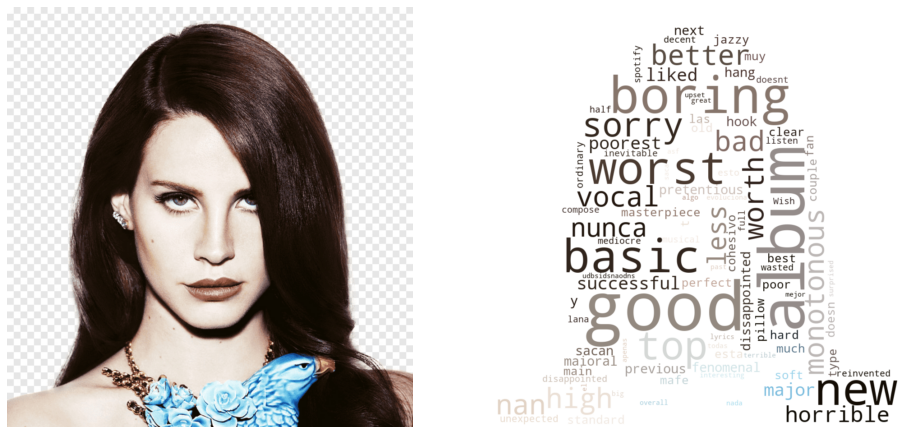

In [40]:
drawWordCloud(adjs,"wordcloudlana-negative")

As palavras mais repetidas das reviews negativas também fazem sentido, como "boring", "basic", "monotonous", "worst", "horrible", e "bad". Algumas palavras de conotação positiva como "good" aparecem, muito provavelmente porque são antecedidas por "not".